# Data Scientist Professional Practical Exam Submission




## 1. 📖 Introduction
Established in 2020 during the Covid Pandemic, Tasty Bytes initially began as a recipe search engine, assisting individuals in discovering creative ways to utilize the limited supplies available at home. Fast forward three years, and Tasty Bytes has evolved into a fully-fledged business.
![image](image.png)


## 2. 🎯 Goals for this project
Currently, the team selects their preferred recipe from a collection to feature on the home page. It has been observed that when they highlight a popular recipe, traffic to the rest of the website increases by up to 40%. However, the challenge lies in determining how to identify whether a recipe will be popular. Given the direct correlation between website traffic and subscriptions, this is a crucial concern for the company.

The Product Manager at Tasty Bytes has explicitly requested the following:

🟢 Develop a predictive model to identify recipes likely to generate high traffic.

🟢 Achieve an 80% accuracy rate in correctly predicting high-traffic recipes.

## 3. 💾 The Dataset:
The TastyBytes Product Manager has supplied comprehensive data for each recipe, including an indication of whether high traffic was observed when the recipe was featured on the home page.
The dataset encompasses the following variables:

recipe: Numeric, a unique identifier for each recipe.
calories: Numeric, the calorie count.
carbohydrate: Numeric, the amount of carbohydrates in grams.
sugar: Numeric, the amount of sugar in grams.
protein: Numeric, the amount of protein in grams.
category: Character, denoting the type of recipe, categorized into one of ten possible groups:
Lunch/Snacks
Beverages
Potato
Vegetable
Meat
Chicken
Pork
Dessert
Breakfast
One Dish Meal
servings: Numeric, indicating the number of servings for the recipe.
high_traffic: Character, indicating whether the site experienced high traffic when the recipe was featured, marked as "High."

## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
# Start coding here...
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


## Data Validation

In [2]:
# Read the data into a dataframe
df = pd.read_csv("recipe_site_traffic_2212.csv")
# Display The First 5 Rows of the dataset
print("The First 5 Rows of the dataset", end="\n\n")
print(df.head(), end="\n\n")
# Display info about the dataset
print(f"{'info about the dataset'.upper()}", end="\n")
print(df.info(), end="\n\n")
# Checking for the number of missing values in each column
print(f"{'the number of missing values in each column'.upper()}")
print(df.isna().sum(), end="\n\n")
# Display unique items in the category column
print(f"{'unique items in the category column'.upper()}")
print(df.category.unique(), end="\n\n")

# Display unique items in the servings column
print(f"{'unique items in the servings column'.upper()}")
print(df.servings.unique(), end="\n\n")

# Display unique items in the high traffic column
print(f"{'unique items in the high traffic column'.upper()}")
print(df.high_traffic.unique(), end="\n\n")

# Display the number of rows for each item in the category appears
print(f"{'the value counts in the category column'.upper()}")
print(df.category.value_counts(), end="\n\n")

The First 5 Rows of the dataset

   recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]

INFO ABOUT THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    

In [3]:
# Merge 'Chicken Breast' with 'Chicken'
df['category'] = df.category.replace("Chicken Breast", "Chicken")
# Convert 'servings' column to numeric
df['servings'] = df['servings'].str.split(expand=True)[0]
servings = df.servings.astype("int")
df['servings'] = servings
# Replace 'High' with 1 and nan with 0
df['high_traffic'] =df.high_traffic.replace("High", 1).fillna(0).astype(int)
# Create a new column 'high_traffic_label'
df['high_traffic_label'] = df.high_traffic.map({1:'High', 0:'Low'})


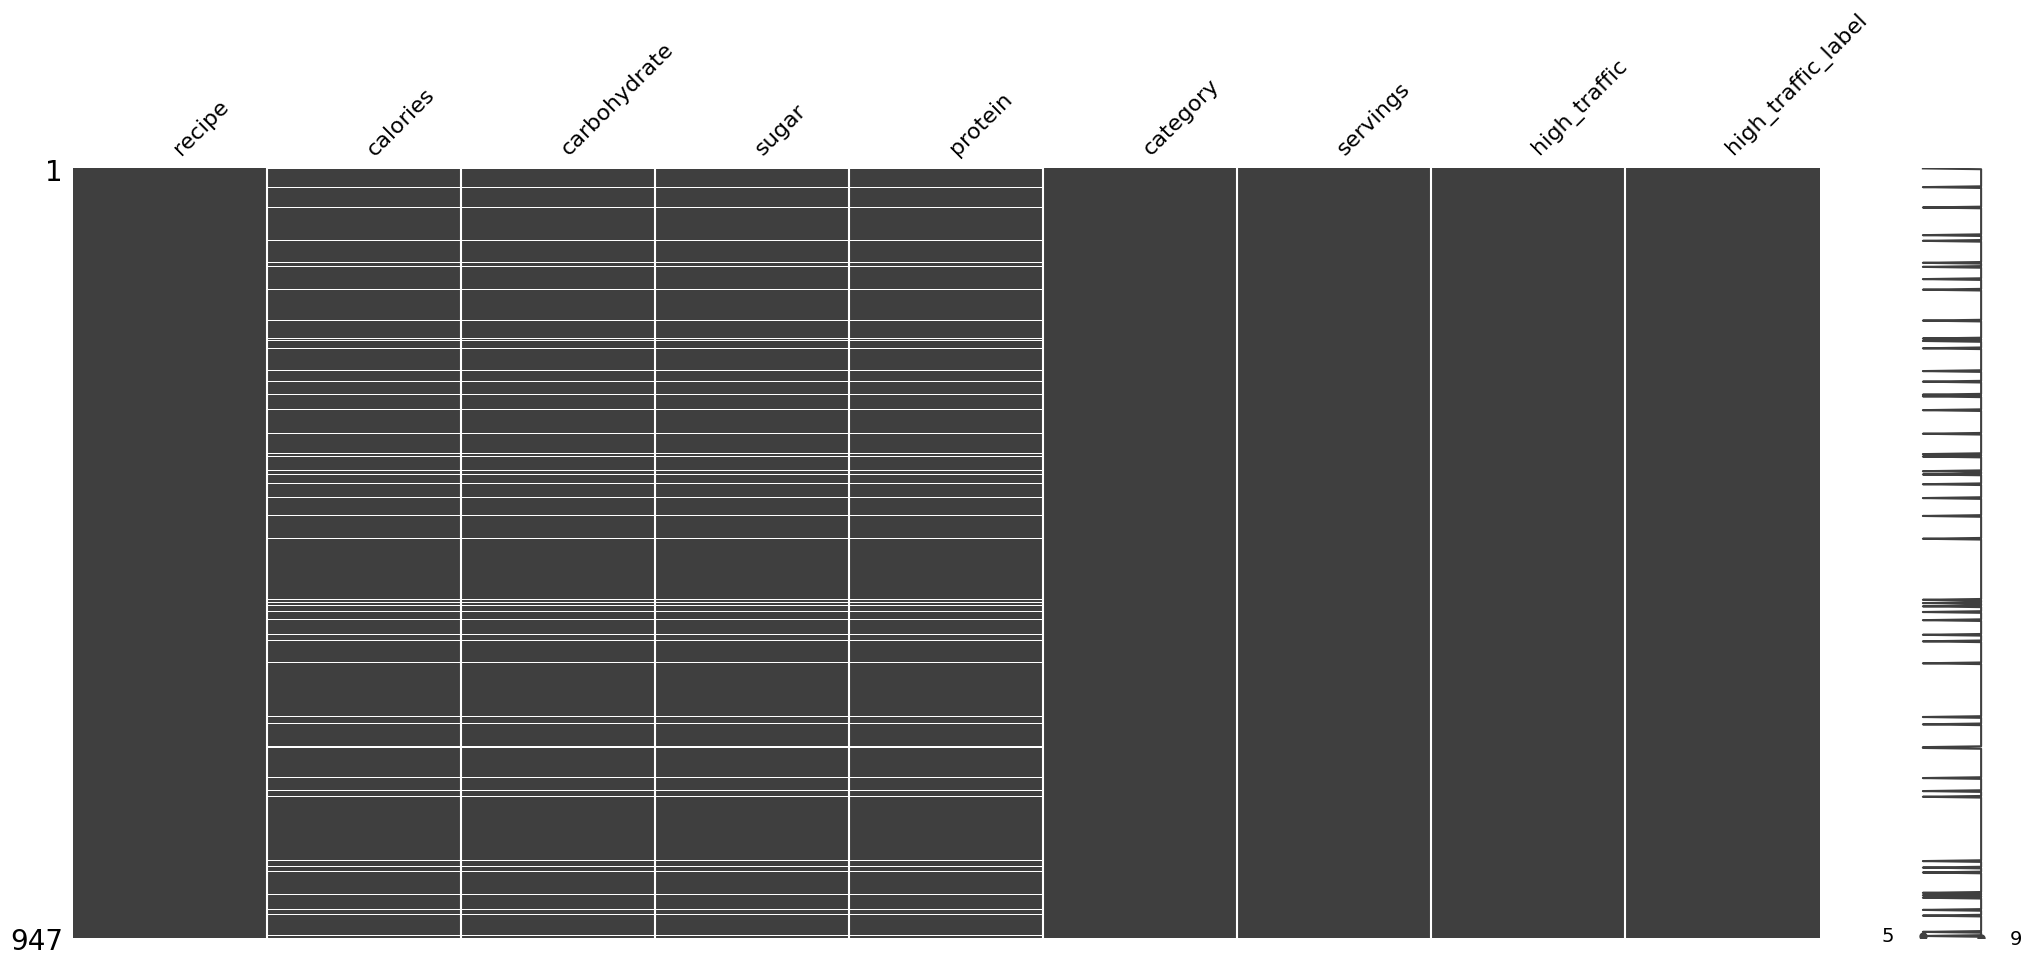

In [4]:
# using missingno for visualizing the missing values
msno.matrix(df)
plt.show()

**Drop rows with missing values**

In [5]:
# Drop missing values
df=df.dropna()
print(df.shape)

(895, 9)


**Checking for Duplicate**

I found out that there is no duplicates in the dataset.

In [6]:
# Are any duplicates in our dataset?
print("Total Duplicates: ", df.duplicated().sum())

Total Duplicates:  0


**Check for negative values**

The protein, calories, carbohydrate, and sugar columns should only contain positive values as they are numeric variables.

After this examination, it resulted that all these variables don't have negative values.

In [7]:
# check if the numeric variables have negative values
num_vars = ['protein', 'calories', 'carbohydrate', 'sugar']
for var in num_vars:
  if df[var].min() < 0:
    print(f'Variable {var} contains negative values')

### Data Validation Summary
The dataset has 8 columns and 947 rows. I observed that there was 52 rows with missing values for calories, carbohydrate, sugar, protein. After removing those rows I was left 895 rows.

**recipe:** It is integer type, unique identifier of recipe. Therefore it matches the description. No cleaning required

**calories:** It is Numeric, number of calories. It matches the description. It has 52 missing values. I removed the missing values

**carbohydrate:** Numeric, amount of carbohydrates in grams. It matches the decription but has 52 missing values. I removed the missing values

**sugar:** Numeric, amount of sugar in grams. It matches the description but has 52 missing values. I removed the missing values

**protein:** Numeric, amount of protein in grams. It matches the description but has 52 missing values. I removed the missing values

**category:** It is character type, and type of recipe. It has no missing values. It does not match the description because it has 11 unique groupings intead of 10. I merged 'Chicken Breast' to 'Chicken' to make it 10 categories of recipe.

**servings:** It is type object, number of servings for the recipe. It has no missing values. Some if it's values contain "as a snack". I splitted the column to get the first character and then converted the the column to integer data type

**high_traffic:** It matches the description. It has 373 missing values. I replaced the missing values with 0 and "High" to 1

**New Column:**

I created a new column high_traffic_label whose values are eith High or Low. It represents the categorial values for values in high_traffic column i.e 0 represents "Low" and 1 represents "High"

I decided to drop all 52 missing values in the calories, carbohydrate, sugar, and protein column because they have missing values in the same rows.

After cleaning and validating data, the dataset contains 895 recipe observations without duplicate rows.

In [8]:
# Print the clean dataset inoformation
print("CLEAN DATASET INFO READY FOR EXPLORATORY ANALYSIS")
print(df.info())

CLEAN DATASET INFO READY FOR EXPLORATORY ANALYSIS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recipe              895 non-null    int64  
 1   calories            895 non-null    float64
 2   carbohydrate        895 non-null    float64
 3   sugar               895 non-null    float64
 4   protein             895 non-null    float64
 5   category            895 non-null    object 
 6   servings            895 non-null    int64  
 7   high_traffic        895 non-null    int64  
 8   high_traffic_label  895 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 69.9+ KB
None


## Exploratory Analysis

**Target Variable - high_traffic**

Since the task at hand is to predict which recipes will lead to high traffic, therefore high_traffic is the target variable. The fig 1 and 2 below show that 60% of the time there was high traffic

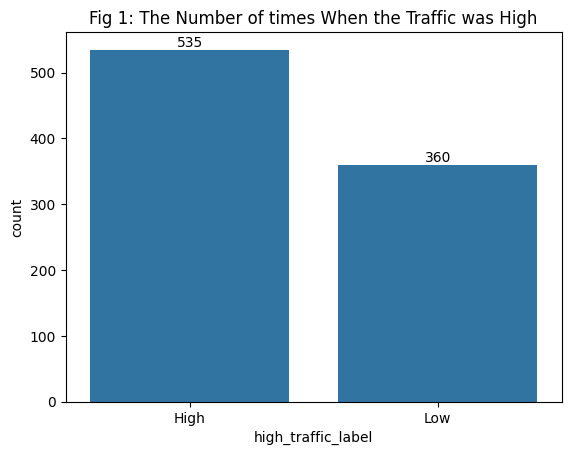

In [9]:
high_traffic = df.high_traffic.map({0: "Low", 1: "High"})
df['high_traffic_label'] = high_traffic
ax=sns.countplot(data=df, x="high_traffic_label")

for label in ax.containers:
    ax.bar_label(label)

plt.title("Fig 1: The Number of times When the Traffic was High");

The fig 1 above shows that the distribution is not equal. There are more number high traffic than low traffic

In [10]:
# Display the percentage of high traffic vs low
print("the percentage of high traffic vs low".title())
print(round(df.high_traffic.value_counts(normalize=True)*100, 2))

The Percentage Of High Traffic Vs Low
1    59.78
0    40.22
Name: high_traffic, dtype: float64


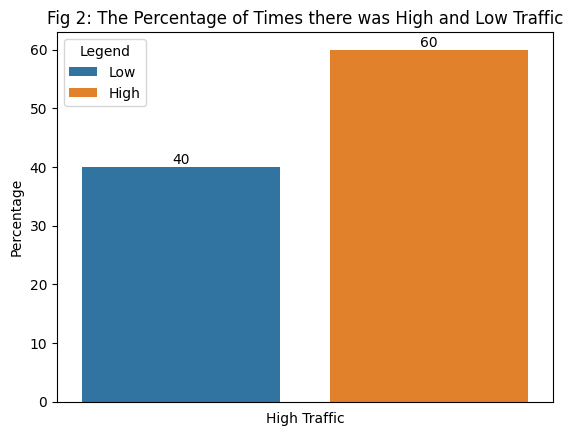

In [11]:
# Plot the percentage of High and Low traffic
high_traffic_percentage = (df.high_traffic.value_counts(normalize=True)*100).round(0)
ax = sns.barplot(x=high_traffic_percentage.index, y=high_traffic_percentage.values, hue=['High', 'Low'])

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Percentage")
plt.xlabel("High Traffic")
plt.xticks([])
plt.legend(title="Legend", loc="upper left")
plt.title("Fig 2: The Percentage of Times there was High and Low Traffic")
plt.show()

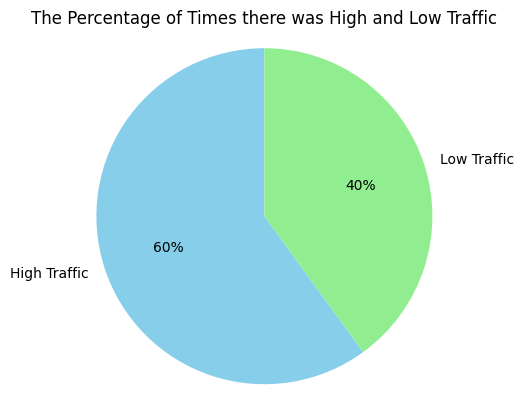

In [12]:
percentage_values = (df.high_traffic.value_counts(normalize=True) * 100).round(0).values
labels = ["High Traffic" if i == 1 else "Low Traffic" for i in df.high_traffic.value_counts(normalize=True).index]

# Create a pie plot
fig, ax = plt.subplots()
ax.pie(percentage_values, labels=labels, autopct='%1.0f%%', startangle=90, colors=['skyblue', 'lightgreen'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("The Percentage of Times there was High and Low Traffic")
plt.show()

I noticed that the percentage of high traffic was 60% and low traffic was 40% as shown in Fig 2

### Servings Versus high_traffic

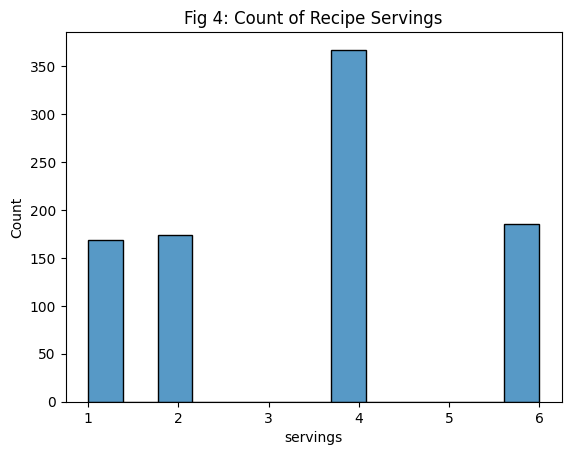

In [13]:
sns.histplot(data=df, x="servings")
plt.title("Fig 4: Count of Recipe Servings")
plt.show()

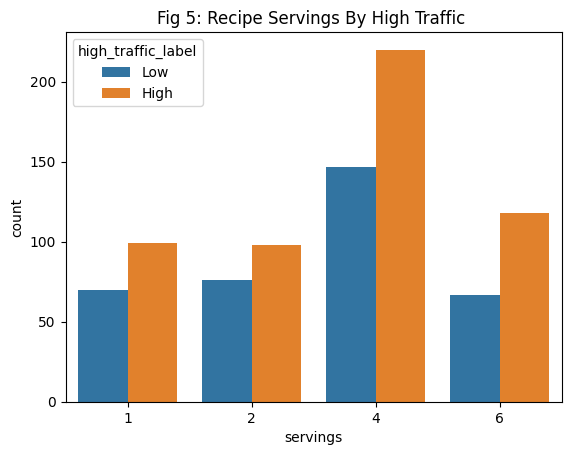

In [14]:
# Display Recipe Servings By High Traffic
sns.countplot(data=df, x='servings', hue="high_traffic_label")
plt.title("Fig 5: Recipe Servings By High Traffic ")
plt.show()

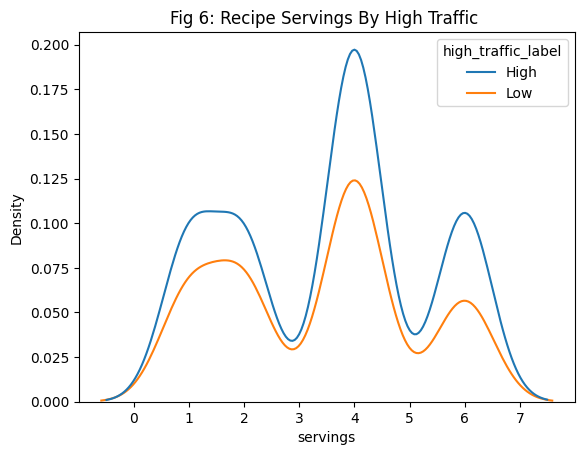

In [15]:
# Display Recipe Servings By High Traffic
sns.kdeplot(data=df, x='servings', hue="high_traffic_label")
plt.title("Fig 6: Recipe Servings By High Traffic ")
plt.show()

High and low traffic flow have the same shape based on servings

**High Traffic By Category**

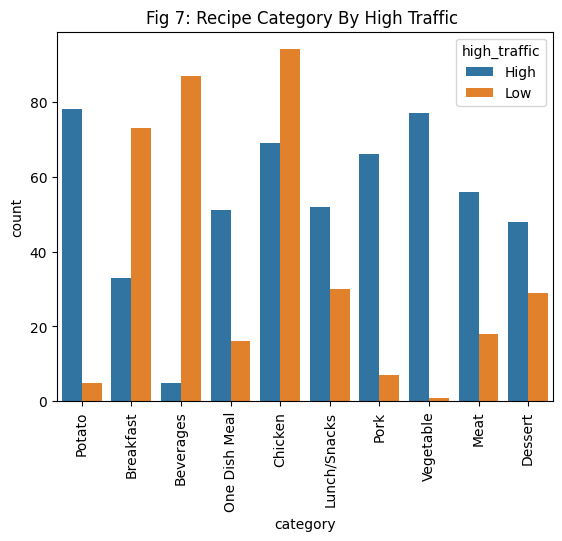

In [16]:
# Plot High Traffic By Recipe Category
sns.countplot(data=df, x='category', hue=high_traffic)
plt.xticks(rotation=90)
plt.title("Fig 7: Recipe Category By High Traffic ")
plt.show()

The fig 7 above shows that whenever a recipe from any of beverages, breakfast, and chicken are displayed, chances of high trafffic is low.

In [17]:
def cat_count(x):
    return len(x)

result = df.groupby('category')['high_traffic'].agg([np.sum, cat_count])
result['percentage'] = round(result['sum']/result['cat_count']*100,1)
print("The Counts and Percentages of High Traffic By category")
print(result)
# Perform Label Encoding on the 'category' column and create a new column 'category_encoded'
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])


The Counts and Percentages of High Traffic By category
               sum  cat_count  percentage
category                                 
Beverages        5         92         5.4
Breakfast       33        106        31.1
Chicken         69        163        42.3
Dessert         48         77        62.3
Lunch/Snacks    52         82        63.4
Meat            56         74        75.7
One Dish Meal   51         67        76.1
Pork            66         73        90.4
Potato          78         83        94.0
Vegetable       77         78        98.7


It was observed that high traffic from the following recipe categories: beverages, breakfast, and chicken are fewer than 50% of the times they are displayed.

I decided to remove all rows that fall in categories of beverages, breakfast, and chicken from the dataframe to create a new dataframe. I called it filtered_df

In [18]:
# Create a new datadrame filtered_df from df
filtered_df = df[~df['category'].isin(['Breakfast', 'Beverages', 'Chicken'])]
print(round(filtered_df.high_traffic.value_counts(normalize=True),2))


1    0.8
0    0.2
Name: high_traffic, dtype: float64


In [19]:

filtered_high_traffic_label = filtered_df.high_traffic.map({1:'High', 0:'Low'})
traffic=filtered_df.high_traffic.value_counts(normalize=True).index.map({1:'High', 0:'Low'})

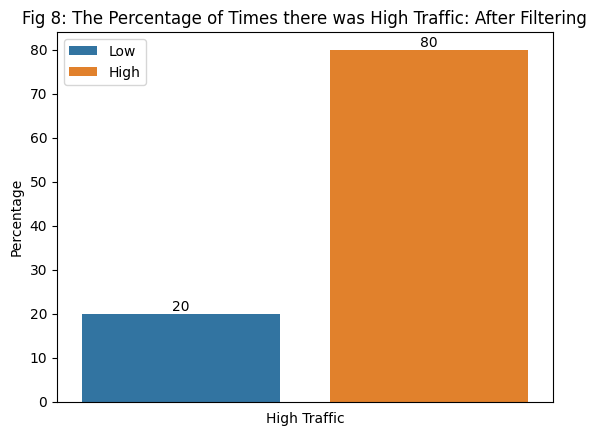

In [20]:
# Plot the percentage of High and Low traffic
high_traffic_percentage = (filtered_df.high_traffic.value_counts(normalize=True)*100).round(0)
ax = sns.barplot(x=high_traffic_percentage.index, y=high_traffic_percentage.values, hue=['High', 'Low'])

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Percentage")
plt.xlabel("High Traffic")
plt.xticks([])
plt.title("Fig 8: The Percentage of Times there was High Traffic: After Filtering");

After I filtered out all rows under the breakfast, beverages, and chicken category, I found out that there was high traffic 80% of the time.

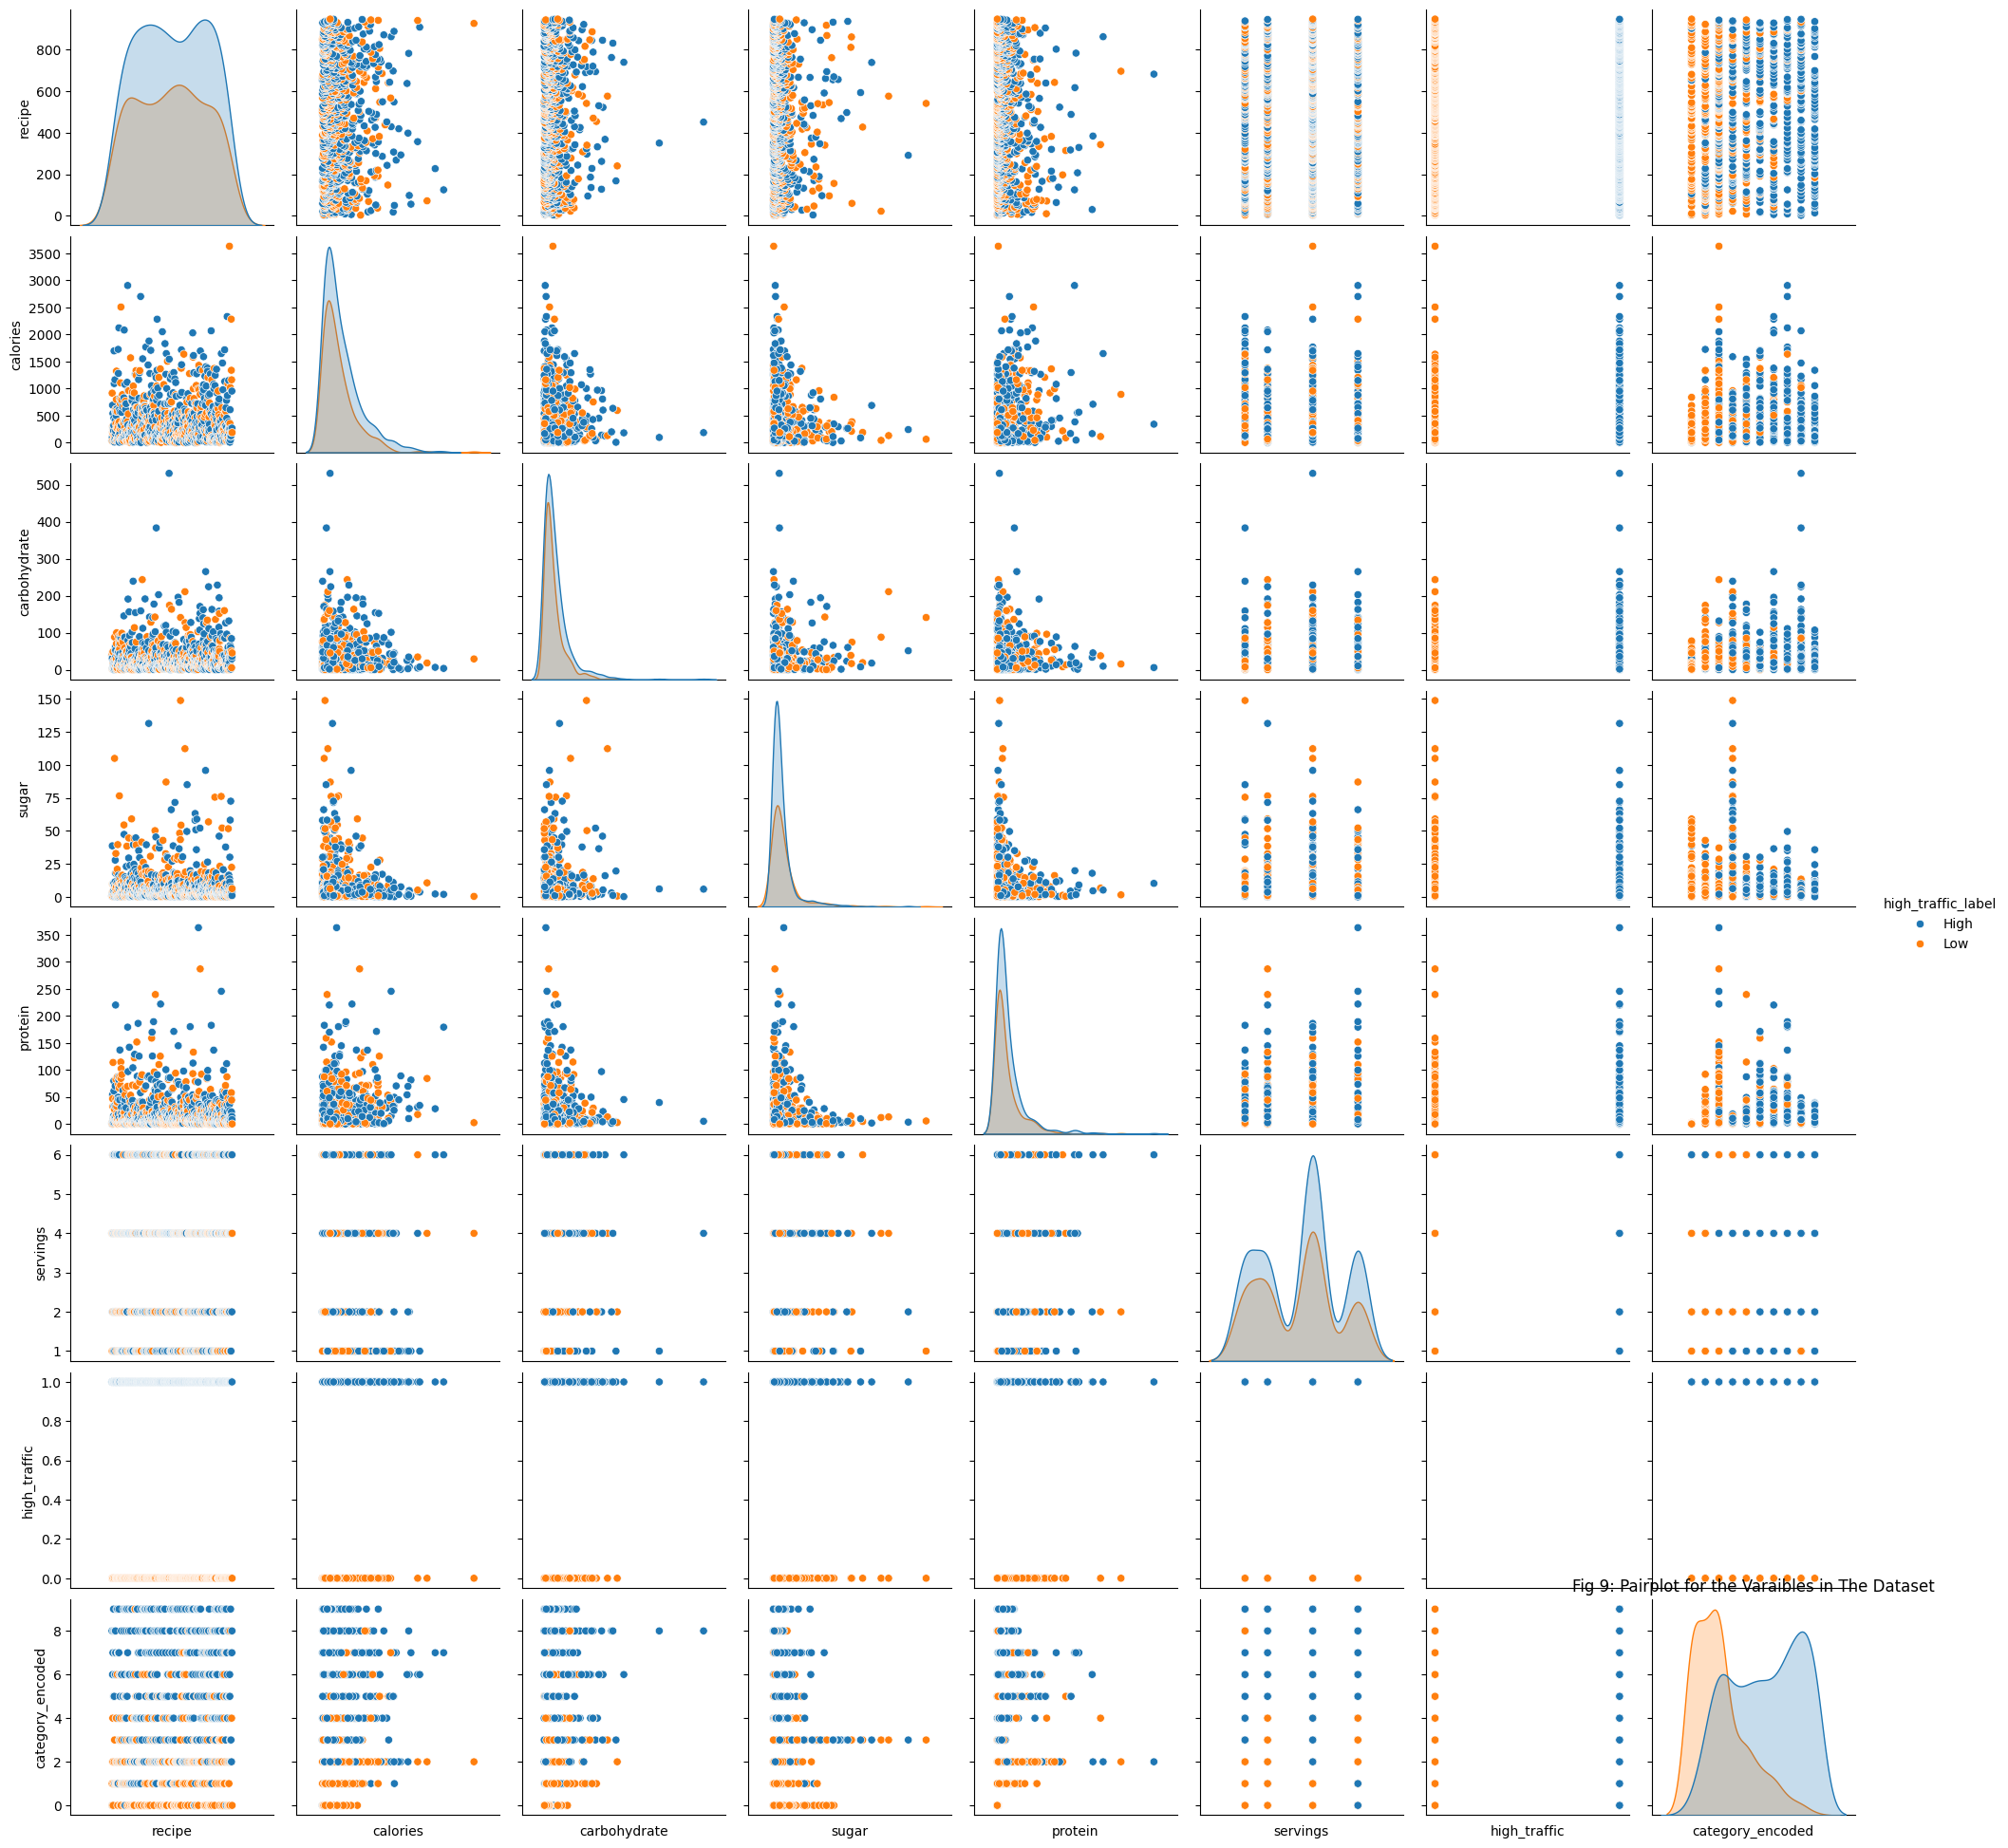

In [21]:
# pairplot diagram of the dataset
pairplot = sns.pairplot(df, hue='high_traffic_label')

# Remove x-axis ticks from each subplot in the pair plot
for ax in pairplot.axes.flat:
    ax.set_xticks([])
plt.title("Fig 9: Pairplot for the Varaibles in The Dataset")
# Show the pair plot
plt.show()

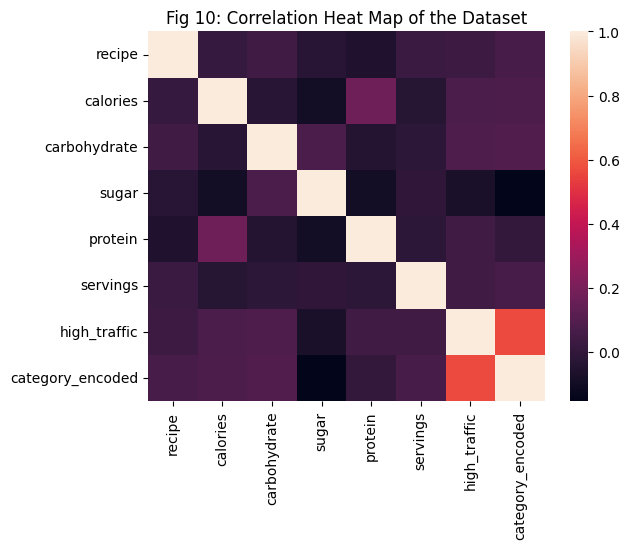

In [22]:
#Display the correlation heatmap for the data
sns.heatmap(df.corr())
plt.title("Fig 10: Correlation Heat Map of the Dataset");

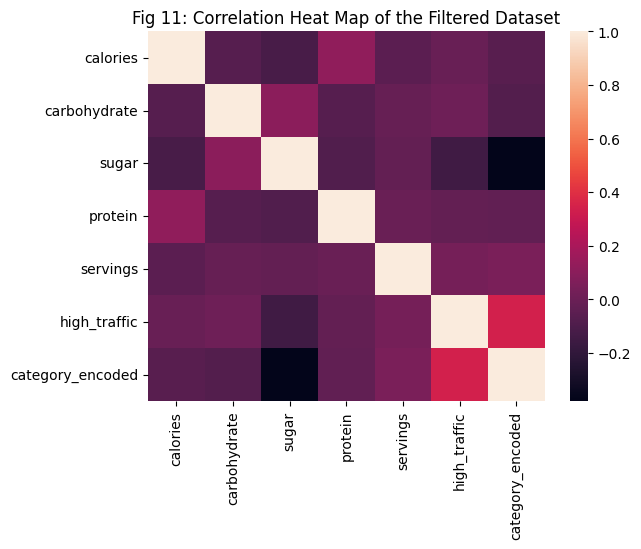

In [23]:
sns.heatmap(filtered_df.drop(columns='recipe').corr())
plt.title("Fig 11: Correlation Heat Map of the Filtered Dataset");

The correlation among the variables are more higher in the filtered dataframe than the unfiltered dataframe

## Model Development

**Type of Problem**

This is a binary classification task where our objective is to forecast whether a recipe's attributes will result in high traffic (class 1) or not (class 0).

**Fitting A Baseline Model**

Logistic regression is chosen as the baseline model due to its simplicity and interpretability in binary classification tasks.

In [24]:


# Define features and target variable
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category_encoded', 'servings']]
y = df['high_traffic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.9459037  0.44543017 0.90726415 0.47036758 0.15299665 0.93148885
 0.22563086 0.51389476 0.59993891 0.42178539]


**Logistic Regression Model Evaluation**

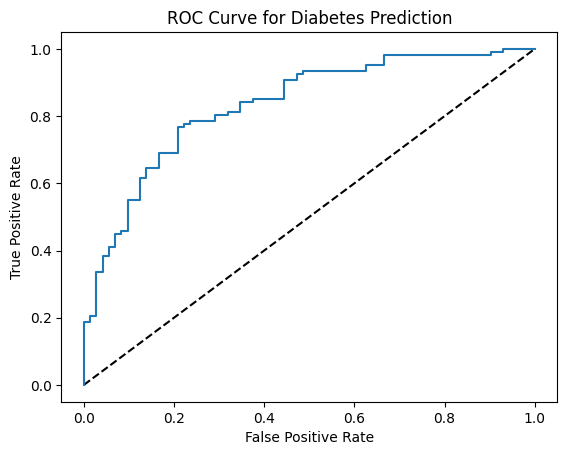

Fig 12: Logistic Regression AUC score: 0.8329439252336448


In [26]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# Calculate roc_auc_score
print(f"Fig 12: Logistic Regression AUC score: {roc_auc_score(y_test, y_pred_probs)}" )

In [27]:
# Make predictions on the test features
log_y_pred = logreg.predict(X_test)


# Calculate the confusion matrix
print(confusion_matrix(y_test, log_y_pred))

# Calculate the classification report
print(classification_report(y_test, log_y_pred))

[[60 12]
 [34 73]]
              precision    recall  f1-score   support

           0       0.64      0.83      0.72        72
           1       0.86      0.68      0.76       107

    accuracy                           0.74       179
   macro avg       0.75      0.76      0.74       179
weighted avg       0.77      0.74      0.75       179



As can be seen above the baseline model, logistic regression model, performed well with AUC score of 0.83 and accuracy score of 74%

### Fine-Tuning, Cross-Validation, and Model Evaluation of the Logistic Regression Model:

In [28]:


# Perform cross-validation to fine-tune hyperparameters
logreg_scores = cross_val_score(logreg, X, y, cv=10)
logreg_mean_accuracy = logreg_scores.mean()
logreg_std =logreg_scores.std()
print(f"Scores: {logreg_scores}")
print(f'Mean Cross-Validation Accuracy: {logreg_mean_accuracy}')

print(f"Standard Deviation: {logreg_std}")
print(f"Confidence Interval: {np.quantile(logreg_scores,[0.025,0.975])}")

Scores: [0.74444444 0.72222222 0.72222222 0.72222222 0.74444444 0.76404494
 0.70786517 0.83146067 0.76404494 0.80898876]
Mean Cross-Validation Accuracy: 0.7531960049937578
Standard Deviation: 0.03815727894443427
Confidence Interval: [0.71109551 0.82640449]


While logistic regression demonstrates effectiveness in capturing underlying patterns, its limitation in achieving high accuracy (80%) for the majority of traffic highlights the need for more sophisticated models.

**Fitting a comparison model**

KNeighborsClassifier is chosen as the comparison model due to its non-parametric nature, simplicity in implementation, and capability to capture complex relationships within the data. 

In [29]:
# Set up a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Calculate the confusion matrix
print(confusion_matrix(y_test, knn_pred))

# Calculate the classification report
print(classification_report(y_test, knn_pred))

[[37 35]
 [38 69]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        72
           1       0.66      0.64      0.65       107

    accuracy                           0.59       179
   macro avg       0.58      0.58      0.58       179
weighted avg       0.60      0.59      0.59       179



KNeighbors Classifier has a performance of 59%. The Logistic Regression model which an accuracy of 74% performed better than KNeighbors Classifier

**Fine-Tuning and Model Evaluation of the KNeighborsClassifier Model:**

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.7793296089385475, 3: 0.7667597765363129, 4: 0.7220670391061452, 5: 0.7304469273743017, 6: 0.7122905027932961, 7: 0.7081005586592178, 8: 0.6955307262569832, 9: 0.6773743016759777, 10: 0.6731843575418994, 11: 0.6787709497206704, 12: 0.6689944134078212} 
 {1: 0.5921787709497207, 2: 0.5307262569832403, 3: 0.5921787709497207, 4: 0.553072625698324, 5: 0.5921787709497207, 6: 0.5698324022346368, 7: 0.6201117318435754, 8: 0.5977653631284916, 9: 0.6256983240223464, 10: 0.5977653631284916, 11: 0.6089385474860335, 12: 0.5754189944134078}


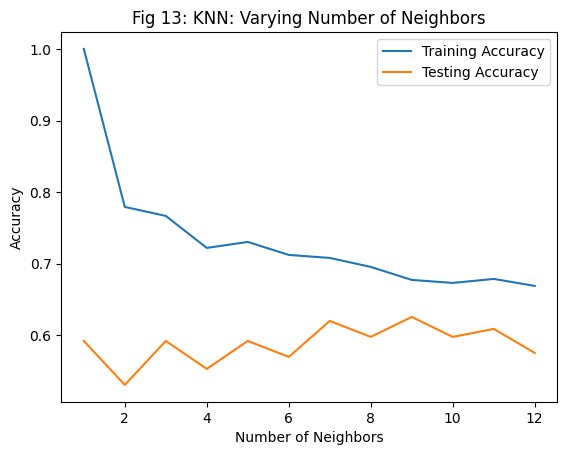

In [30]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Add a title
plt.title("Fig 13: KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Fig 12 shows that the highest accuracy for KNeighbor classifier on the test features is 63%.

### Filtered DF

I repeated the same procedure of model fitting, fine-tuning and evaluation for the filtered df i.e the dataframe after categories such as chicken, breakfast and beverages have been removed to see if model performance will be improved

In [31]:
# Perform Label Encoding on the 'category' column
label_encoder = LabelEncoder()
filtered_df['category_encoded'] = label_encoder.fit_transform(filtered_df['category'])


# Define features and target variable
filtered_X = filtered_df[['calories', 'carbohydrate', 'sugar', 'protein', 'category_encoded', 'servings']]
filtered_y = filtered_df['high_traffic']

# Split the data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(filtered_X, filtered_y, test_size=0.2, random_state=42, stratify=filtered_y)

In [32]:
# Instantiate the model
logreg = LogisticRegression(max_iter=100000)

# Fit the model
logreg.fit(X_train_f, y_train_f)

# Predict probabilities
y_pred_probs_f = logreg.predict_proba(X_test_f)[:, 1]

print(y_pred_probs_f[:10])

[0.94925474 0.65701302 0.58339233 0.91249384 0.77705002 0.82863798
 0.88712308 0.65690514 0.65272371 0.9404986 ]


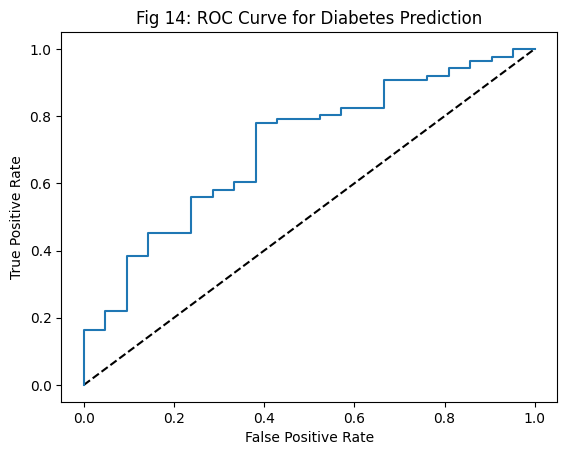

In [33]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_f, y_pred_probs_f)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fig 14: ROC Curve for Diabetes Prediction')
plt.show()

In [34]:
y_pred_f = logreg.predict(X_test_f)
# Calculate roc_auc_score
print(roc_auc_score(y_test_f, y_pred_probs_f))

# Calculate the confusion matrix
print(confusion_matrix(y_test_f, y_pred_f))

# Calculate the classification report
print(classification_report(y_test_f, y_pred_f))

0.7070874861572537
[[ 0 21]
 [ 0 86]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.80      1.00      0.89        86

    accuracy                           0.80       107
   macro avg       0.40      0.50      0.45       107
weighted avg       0.65      0.80      0.72       107



An accuracy of 80% suggest a better performance but but somewhat bias towards high traffic

Fine Tuning The Logistic Regression on the Filtered DF

In [35]:


# Perform cross-validation to fine-tune hyperparameters
scores = cross_val_score(logreg, filtered_X, filtered_y, cv=10)
mean_accuracy = scores.mean()
print(f'Mean Cross-Validation Accuracy: {mean_accuracy}')
print(scores)

Mean Cross-Validation Accuracy: 0.7977288609364083
[0.7962963  0.81481481 0.7962963  0.7962963  0.81132075 0.81132075
 0.75471698 0.81132075 0.79245283 0.79245283]


A mean score of 80% shows that there is higher chances of getting high traffic 80% of the time

**KNeighbor Classifier Model on the Filtered DF**

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8313817330210773, 3: 0.8126463700234192, 4: 0.8056206088992974, 5: 0.8009367681498829, 6: 0.8149882903981265, 7: 0.8009367681498829, 8: 0.8032786885245902, 9: 0.8079625292740047, 10: 0.8009367681498829, 11: 0.8032786885245902, 12: 0.8032786885245902} 
 {1: 0.7289719626168224, 2: 0.6448598130841121, 3: 0.8037383177570093, 4: 0.7570093457943925, 5: 0.7850467289719626, 6: 0.7663551401869159, 7: 0.8037383177570093, 8: 0.7663551401869159, 9: 0.8037383177570093, 10: 0.794392523364486, 11: 0.8037383177570093, 12: 0.8037383177570093}


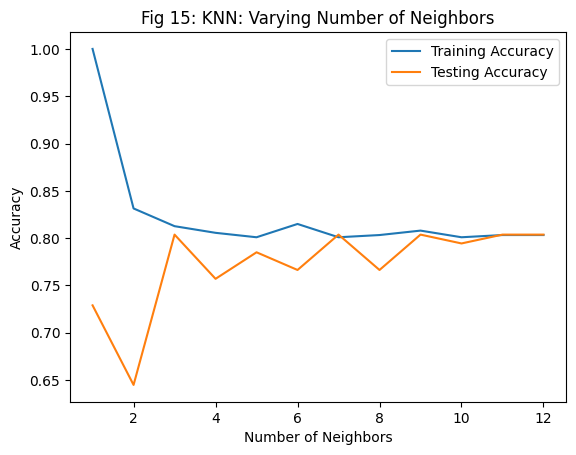

In [36]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train_f, y_train_f)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train_f, y_train_f)
	test_accuracies[neighbor] = knn.score(X_test_f, y_test_f)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Add a title
plt.title("Fig 15: KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [37]:
# Calculate the confusion matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_f, y_train_f)
y_pred_f = knn.predict(X_test_f)
print(confusion_matrix(y_test_f, y_pred_f))

# Calculate the classification report
print(classification_report(y_test_f, y_pred_f))

[[ 5 16]
 [ 5 81]]
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        21
           1       0.84      0.94      0.89        86

    accuracy                           0.80       107
   macro avg       0.67      0.59      0.60       107
weighted avg       0.77      0.80      0.77       107



An accuracy of 80% suggests that the model performs well on the test data. Although Logistic regression shows comparable performance, the KNeighbor classifier's lack of bias likely contributed to its superior performance, as it is more flexible in capturing complex relationships within the data.

In [38]:
# Performing cross-validation
scores_f = cross_val_score(knn, filtered_X, filtered_y, cv=10)
mean_accuracy_f = scores_f.mean()
print(f'Mean Cross-Validation Accuracy: {mean_accuracy_f}')
print(scores_f)

Mean Cross-Validation Accuracy: 0.7341020265548567
[0.74074074 0.7962963  0.75925926 0.62962963 0.71698113 0.79245283
 0.75471698 0.67924528 0.73584906 0.73584906]


The accuracy score of the Kneighbor classifier on the filtred dataframe is centred around 77% which is a good result

## Business Metrics
As stated in the initial email, the goal is to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. 

The study from the data given by the product team shows that there was 60% high traffic. Inorder to bridge the gap between 80% target and the reality on ground, Inspection on which categories of recipe result often in low traffic or high traffic was done. 

Categories of recipe such as breakfast, chicken and beverages tend to result in low trafic. Further analysis shows We could achieve a traffic of 80% if those recipe in categories of breakfast, beverages and chicken are removed from the dataframe.

## Summary
The objective of this report is to outline the analysis conducted to predict which recipes, when featured on the website homepage, will generate high traffic. This prediction aims to increase subscriptions, ultimately benefiting the company.

Given that selecting a popular recipe could potentially result in a 40% increase in website traffic, the business aims to:

1. Predict which recipes will generate high traffic.
2. Achieve an 80% accuracy in correctly identifying recipes that will lead to high traffic, thereby optimizing the selection process and capitalizing on increased user engagement.

The data provided by the product team consists of 947 observations, with 52 of them containing missing values for the nutritional information. Considering the crucial role of nutritional information in this analysis, these 52 observations were removed to ensure a comprehensive and accurate assessment of the recipes' impact on website traffic.

From the exploratory data analysis conducted, the following insights were observed:

1. The dataset exhibited a higher proportion of high-traffic recipes compared to low-traffic recipes in a ratio of 3:2.
2. Comparison of recipe categories revealed that recipes for vegetables, potatoes, pork, one-dish meals, meat, lunch/snacks, and desserts generated higher traffic, highlighting the substantial influence of recipe categories on popularity.
3. Conversely, it was revealed that factors such as calories, sugar content, carbohydrates, protein, and the number of servings did not significantly impact site traffic. Additionally, no linear correlations were found among these five variables.

Based on the model evaluation, the logistic regression model outperformed the KNeighbor classifier in terms of accuracy, precision, and recall. Specifically:

For the logistic regression model:
- Accuracy: 74%
- Precision: 86%
- Recall: 68%

For the KNeighbor classifier:
- Accuracy: 59%
- Precision: 66%
- Recall: 64%

These metrics collectively indicate that the logistic regression model demonstrates better overall performance in predicting high-traffic recipes, with higher accuracy, precision, and recall compared to the KNeighbor classifier.

**Filtered Dataset:** it appears that both the logistic regression model and the KNeighbor classifier exhibited comparable performance on the filtered dataset, with an accuracy of 80%. However, notable distinctions in precision and recall were observed:

For the logistic regression model:
- Precision: 80%
- Recall: 100%

For the KNeighbor classifier:
- Precision: 84%
- Recall: 89%

Additionally, it's important to note that the logistic regression model displayed a bias towards high traffic, as evidenced by its 0% recall for low traffic recipes. In contrast, the KNeighbor classifier demonstrated a more balanced approach, with a 24% recall for low traffic, indicating its ability to capture instances of both high and low traffic recipes.
### Recommendations
To ensure the business attains its objective of achieving high traffic 80% of the time, based on my findings, I propose the following recommendations:
1. Prioritize the promotion of recipes from currently popular categories, such as vegetables, potatoes, and pork, to capitalize on their existing high demand.
2. Deployment the KNeighbor Classifier in the production environment to monitor recipe popularity before their publication on the website's homepage: This model can accurately predict high-traffic recipes 80% of the time, effectively minimizing the risk of showcasing recipes with low traffic. 
3. Consider augmenting the training dataset with additional records that contain complete information and minimal missing values.
4. Furthermore, to enhance the model's performance, I recommend enriching the dataset with additional features, including recipe preparation time, cost per serving, and user-generated metrics such as difficulty levels and user ratings. Integrating these data points will not only improve the current model's predictive capabilities but also lay the foundation for the development of more advanced models in the future, enabling better-informed decision-making and heightened user satisfaction.
